### Goal: to retrieve professionally collected weather data from an online source to predict coffee harvests in Minas Gerais, Brazil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
monthly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/MonthlyMedians.csv")
yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/YearlyMedians.csv")
harvest_yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/br_final.csv").dropna()
minas_harvest = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/harvest_weather.csv")

In [44]:
harvest_yearly_index = harvest_yearly.set_index(harvest_yearly["year"])
parana = harvest_yearly[harvest_yearly["subdivision"] == "Parana"]
minas = harvest_yearly[harvest_yearly["subdivision"] == "Minas Gerais"]
espirit = harvest_yearly[harvest_yearly["subdivision"] == "Espirito Santo"]
paulo = harvest_yearly[harvest_yearly["subdivision"] == "Sao Paulo"]
#merge1 = pd.merge(parana,minas, how="outer", left_index=True, right_index=True)
#print(merge1)
location_compare = pd.DataFrame({"Parana":parana, 
                                "Minas Gerais":minas, 
                                "Espirito Santo":espirit, 
                                "Sao Paulo":paulo
                                },index = harvest_yearly["subdivision"])
                                
print(location_compare)

ValueError: 2

<Axes: ylabel='temperature'>

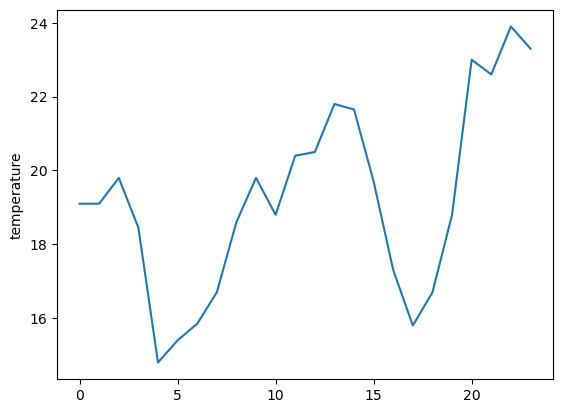

In [5]:
sns.lineplot(monthly["temperature"])

Chart shows two sharp drops around 4 and 17. 
Year 2 had a higher average temperature than Year 1

<Axes: ylabel='temperature'>

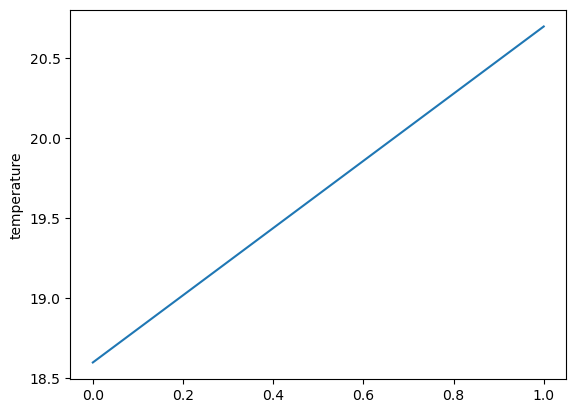

In [34]:
sns.lineplot(yearly["temperature"])

While not very informative, this does confirm year 2 was hotter that year 1.

<Axes: ylabel='precipitation'>

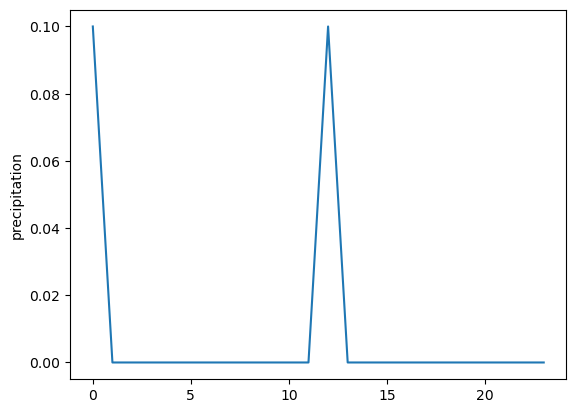

In [30]:
sns.lineplot(monthly["precipitation"])

Precipitation also seems to occur in 12 month cycles.

<Axes: ylabel='humidity'>

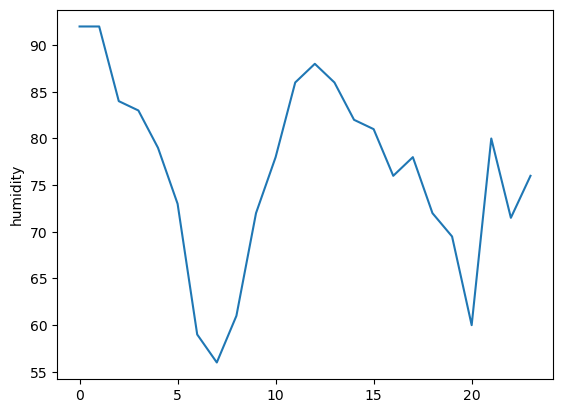

In [29]:
sns.lineplot(monthly["humidity"])

Possible correlation between rainfall and precipitation. Humidity shaply peaks in the same period precipitation occurs. Slowly drops for months after.
Possible correlation with tempurature as well.


<Axes: ylabel='pressure'>

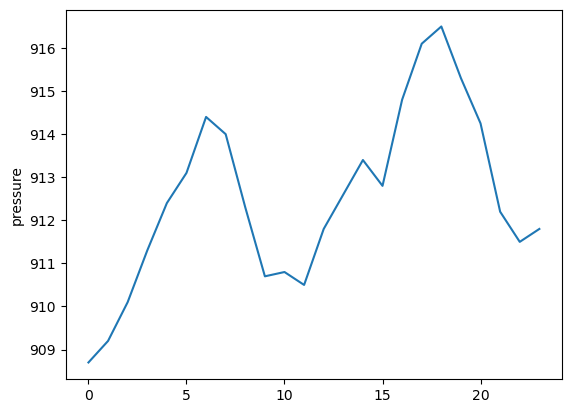

In [32]:
sns.lineplot(monthly["pressure"])

Pressure has a strong inverse correlation with Humidity. However it looks like pressure moves about a month or two sooner than humidity. Let's look more into that

<Axes: xlabel='humidity', ylabel='pressure'>

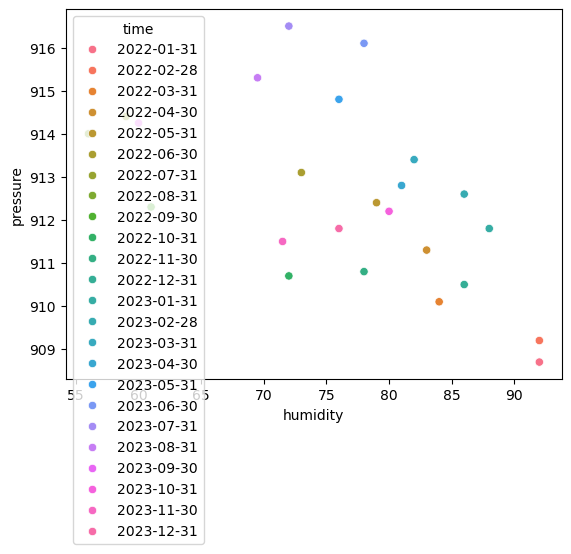

In [11]:
sns.scatterplot(data=monthly, x=monthly["humidity"], y=monthly["pressure"], hue=monthly["time"])


### Analysing Local Harvest data for Minas Gerais and other local areas

<Axes: xlabel='subdivision'>

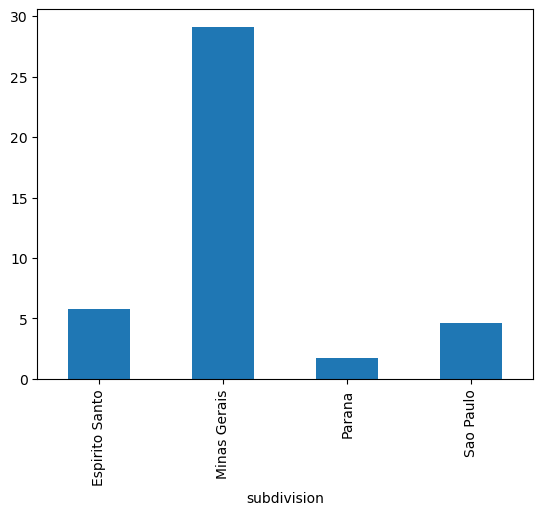

In [46]:
h1 = harvest_yearly.groupby("subdivision")["million_60kgs_bag"].median()
h1.plot.bar()


Minas Gerais seems to produce much more coffee that other local cities.

TypeError: 'line' must be an instance of matplotlib.lines.Line2D, not a pandas.core.series.Series

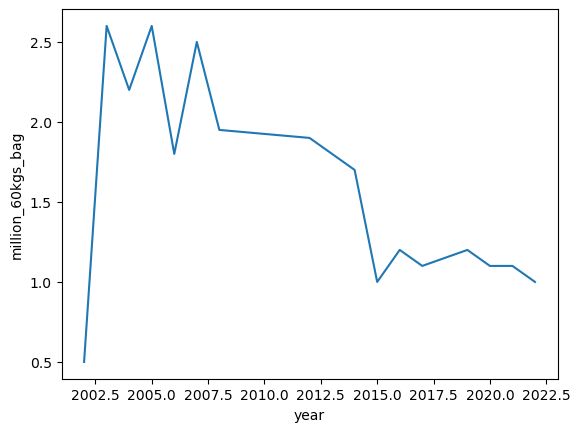

In [8]:
harvest_yearly = harvest_yearly.set_index(harvest_yearly["year"])
parana = harvest_yearly[harvest_yearly["subdivision"] == "Parana"]
parana_bag = parana["million_60kgs_bag"]
minas = harvest_yearly[harvest_yearly["subdivision"] == "Minas Gerais"]
minas_bag = minas["million_60kgs_bag"]
espirit = harvest_yearly[harvest_yearly["subdivision"] == "Espirito Santo"]
espirit_bag = espirit["million_60kgs_bag"]
paulo = harvest_yearly[harvest_yearly["subdivision"] == "Sao Paulo"]
paulo_bag = paulo["million_60kgs_bag"]
sns.lineplot(parana_bag).add_line(espirit_bag)
#sns.lineplot(espirit_bag)
sns.lineplot(paulo_bag)
sns.lineplot(minas_bag)


This chart shows just how many more bags Minas Gerais is producing.

<Axes: xlabel='year', ylabel='avg_unemp_perc'>

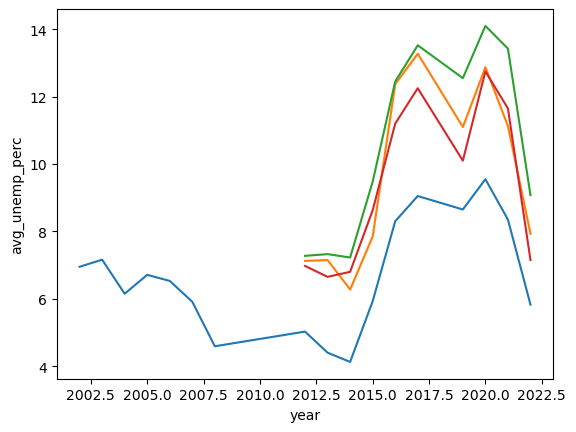

In [76]:
parana = minas_yearly[minas_yearly["subdivision"] == "Parana"]
parana_unemp = parana["avg_unemp_perc"]
minas = minas_yearly[minas_yearly["subdivision"] == "Minas Gerais"]
minas_unemp = minas["avg_unemp_perc"]
espirit = minas_yearly[minas_yearly["subdivision"] == "Espirito Santo"]
espirit_unemp = espirit["avg_unemp_perc"]
paulo = minas_yearly[minas_yearly["subdivision"] == "Sao Paulo"]
paulo_unemp = paulo["avg_unemp_perc"]
sns.lineplot(parana_unemp)
sns.lineplot(espirit_unemp)
sns.lineplot(paulo_unemp)
sns.lineplot(minas_unemp)

Unemployment percentages have followed nearly identical patterns over the years, regardless of where the harvest takes place.

<Axes: xlabel='temperature', ylabel='million_60kgs_bag'>

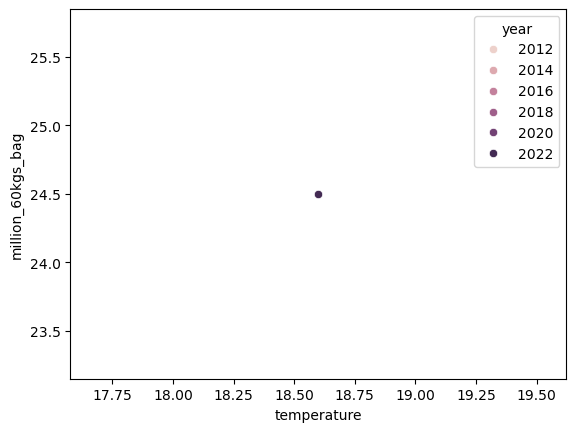

In [49]:
sns.scatterplot(data=minas_harvest, x=minas_harvest["temperature"], y=minas_harvest["million_60kgs_bag"], hue=minas_harvest["year"])

In [57]:
pd.pivot_table(minas_yearly, values="million_60kgs_bag", index="subdivison", columns="year", aggfunc="median")

KeyError: 'subdivison'